# Data Import and Preview

In [ ]:
!pip install tableone

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math

from tableone import TableOne, load_dataset

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.linear_model import Ridge

from statsmodels.stats.power import TTestPower
# seed
s = np.random.seed(11535149) 

In [3]:
from google.colab import drive
drive.mount('/content/drive')
folder = os.getcwd() + '/drive/MyDrive/'

Mounted at /content/drive


In [4]:
raw_data = pd.read_csv(folder + 'marketing_campaign.csv', sep="\t").drop(["Z_CostContact", "Z_Revenue"], axis = 1)

In [5]:
raw_data.columns.values

array(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Response'], dtype=object)

## Variables (27)

* **1 unique Column**: ID

* **17 continuous variables**: Year_Birth, Income, Kidhome, Teenhome,   Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts,MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth

* **9 categorical variable**: Education, Marital_Status, Complain, AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, Response

### People (10)
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products (6)
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

### Promotion (7)
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place (4)
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [ ]:
raw_data[['Income','Kidhome', 'Teenhome', 'Recency', "Year_Birth",
          'MntFruits', 'MntMeatProducts', 'MntFishProducts',
          'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
          'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
          'NumWebVisitsMonth']].describe()
# customer tend to shop on web or store
# customer buy more on meat, then gold (interesting) products
# the mean income is 52247, some outliers in the income
# the smallest year_birth is 1893, some outliers in the year_birth

,Income,Kidhome,Teenhome,Recency,Year_Birth,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,1968.805804,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,25173.076661,0.538398,0.544538,28.962453,11.984069,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,1730.000000,0.000000,0.000000,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,1959.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51381.500000,0.000000,0.000000,49.000000,1970.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68522.000000,1.000000,1.000000,74.000000,1977.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,666666.000000,2.000000,2.000000,99.000000,1996.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [ ]:
raw_data.info() # Dt_Customer is not a date variable, need revise

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
raw_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
# print the category in the 9 categorical variable
for i in ["Education", "Marital_Status", 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Response']:
    print(i, raw_data[i].value_counts())
    print()

Education Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Marital_Status Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

AcceptedCmp3 0    2077
1     163
Name: AcceptedCmp3, dtype: int64

AcceptedCmp4 0    2073
1     167
Name: AcceptedCmp4, dtype: int64

AcceptedCmp5 0    2077
1     163
Name: AcceptedCmp5, dtype: int64

AcceptedCmp1 0    2096
1     144
Name: AcceptedCmp1, dtype: int64

AcceptedCmp2 0    2210
1      30
Name: AcceptedCmp2, dtype: int64

Complain 0    2219
1      21
Name: Complain, dtype: int64

Response 0    1906
1     334
Name: Response, dtype: int64



# Data Preprocessing

In [6]:
data = raw_data

# drop na values, only 24/2240 = 1.07% missing values
data.dropna(inplace=True) 
data.shape

(2216, 27)

In [7]:
data["Age"] = 2022-data["Year_Birth"]
data = data.drop(["Year_Birth"], axis=1)

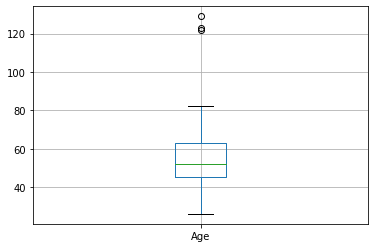

In [8]:
data.boxplot(column=['Age']) 

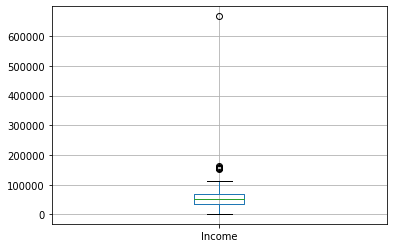

In [9]:
data.boxplot(column=['Income']) 

In [10]:
data = data[(data["Age"] < 85)]
data = data[(data["Income"] < 200000)]
data.shape # remove 2216-2212 = 4 outliers

(2212, 27)

In [11]:
#Construct age group
conditions = [
    (data["Age"] < 50),
    (data["Age"] >= 50),
]

values = ['<50', '>=50']
data["Age_Group"] = np.select(conditions, values)

#Construct income group
conditions = [
    (data["Income"] < 40000),
    (data["Income"] >= 40000) & (data["Income"] < 80000),
    (data["Income"] >= 80000),
]

values = ['<40000', '[40000, 80000)', '>=80000']
data["Income_Group"] = np.select(conditions, values)

#Label high or low income via median
data["Income_Situation"] = np.select([(data["Income"] < data["Income"].median()),
                                       (data["Income"] >= data["Income"].median())], 
                                     ["low income", "high income"])

#Calculate the total amount spending
data["MntTotal"] = data["MntWines"]+ data["MntFruits"]+ \
data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Calculate the total number of purchases
data["NumTotalPurchases"] = data['NumDealsPurchases'] + data['NumWebPurchases'] + \
data['NumCatalogPurchases'] + data['NumStorePurchases']

#Calculate the total number of kids in case we will use it
data["TotalKids"] = data["Kidhome"] + data["Teenhome"]

#Construct a column about customer's family situation
# 1. Single mom/dad with child/children
# 2. Single people without child
# 3. people with a partner (whatever married or not) with child/children
# 4. people with a partner (whatever married or not) without child/children
data["Single"] = data["Marital_Status"].replace({"Single": 1, "Divorced": 1, "Widow": 1, 
                                                 "Alone": 1, "Absurd": 1, "YOLO": 1,
                                                 "Together": 0, "Married": 0})

conditions = [
    (data["Single"] == 1) & (data["Kidhome"] + data["Teenhome"] > 0),
    (data["Single"] == 1) & (data["Kidhome"] + data["Teenhome"] == 0),
    (data["Single"] != 1) & (data["Kidhome"] + data["Teenhome"] > 0),
    (data["Single"] != 1) & (data["Kidhome"] + data["Teenhome"] == 0)
]

values = ['Single w Child', 'Single wn Child', 'Married w Child', 'Married wn Child']
data["Family_Situation"] = data['Age Group'] = np.select(conditions, values)
data["Family_Situation"] = data["Family_Situation"].values
data['Family1'] = data["Family_Situation"].replace({'Single w Child': 1, 'Single wn Child': 0, 'Married w Child':0, 'Married wn Child': 0})
data['Family2'] = data["Family_Situation"].replace({'Single w Child': 0, 'Single wn Child': 1, 'Married w Child':0, 'Married wn Child': 0})
data['Family3'] = data["Family_Situation"].replace({'Single w Child': 0, 'Single wn Child': 0, 'Married w Child':1, 'Married wn Child': 0})

# 2nd cycle means "master" in Sweden, not sure, need discussion
data["Education"] = data["Education"].replace({"Basic": "NotGraduated", "Graduation": "Graduated",
                                               "Master": "NotGraduated", "2n Cycle": "NotGraduated", 
                                               "PhD": "NotGraduated"})
data["Education"] = data["Education"].replace({"NotGraduated": 0, "Graduated": 1})

# tranfer the date of enrollment to date variable 
data["Dt_Customer"] = pd.to_datetime(data['Dt_Customer'], infer_datetime_format=False, errors='ignore')
data['EnrollmentDuration'] = (pd.to_datetime('01-01-2022')-data["Dt_Customer"]).apply(lambda x: [math.floor(x.days / 30) if math.floor(x.days / 30) != 0 else 1][0])

data["AcceptNum"] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']

# Exploratory Data Analysis

In [12]:
data_bar = pd.DataFrame(data.groupby(['Family_Situation'])["Response"].sum())
data_bar["No Response"] = data.groupby(['Family_Situation'])["ID"].count() - data_bar["Response"]
data_bar["Total Customers"] = data.groupby(['Family_Situation'])["ID"].count()
data_bar["Response_Percentage"] = round(data_bar["Response"] / data_bar["Total Customers"] * 100, 2)
data_bar = pd.DataFrame(data_bar).reset_index()
data_bar

,Family_Situation,Response,No Response,Total Customers,Response_Percentage
0,Married w Child,91,957,1048,8.68
1,Married wn Child,67,313,380,17.63
2,Single w Child,74,458,532,13.91
3,Single wn Child,101,151,252,40.08


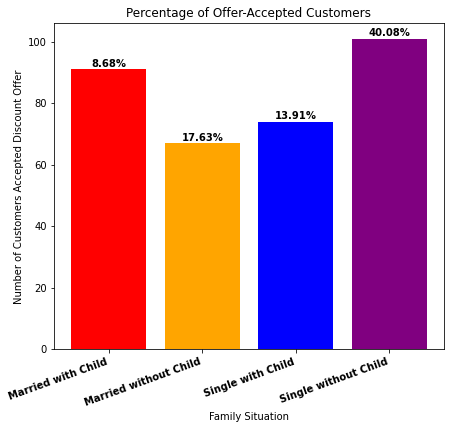

In [13]:
plt.figure(figsize=(7,6))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(data_bar.Family_Situation,data_bar.Response, color = colors_list)
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data_bar.Response_Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1

bars = ('Married with Child', 'Married without Child', 'Single with Child', 'Single without Child')
y_pos = np.arange(len(bars))
plt.title('Percentage of Offer-Accepted Customers')
plt.xticks(y_pos, bars, color='black', fontweight='bold', rotation=20, fontsize='10', horizontalalignment='right')
plt.ylabel("Number of Customers Accepted Discount Offer")
plt.xlabel("Family Situation")
plt.show()
#Resonable, single with child people may be young, who do not have enough money and cares about discount

In [14]:
data_bar = pd.DataFrame(data.groupby(['Income_Group'])["Response"].sum())
data_bar["No Response"] = data.groupby(['Income_Group'])["ID"].count() - data_bar["Response"]
data_bar["Total Customers"] = data.groupby(['Income_Group'])["ID"].count()
data_bar["Response_Percentage"] = round(data_bar["Response"] / data_bar["Total Customers"] * 100, 2)
data_bar = pd.DataFrame(data_bar).reset_index()
data_bar

,Income_Group,Response,No Response,Total Customers,Response_Percentage
0,<40000,85,646,731,11.63
1,>=80000,87,128,215,40.47
2,"[40000, 80000)",161,1105,1266,12.72


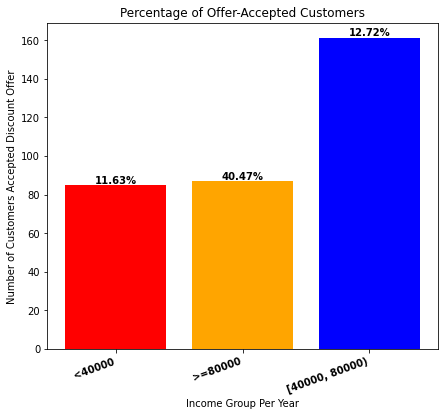

In [15]:
plt.figure(figsize=(7,6))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(data_bar.Income_Group, data_bar.Response, color = colors_list)
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data_bar.Response_Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1

bars = ('<40000', '>=80000', '[40000, 80000)')
y_pos = np.arange(len(bars))
plt.title('Percentage of Offer-Accepted Customers')
plt.xticks(y_pos, bars, color='black', fontweight='bold', rotation=20, fontsize='10', horizontalalignment='right')
plt.ylabel("Number of Customers Accepted Discount Offer")
plt.xlabel("Income Group Per Year")
plt.show()
#High income people accept offer more than people with income lower than 80000

In [16]:
data_bar = pd.DataFrame(data.groupby(['Income_Situation'])["Response"].sum())
data_bar["No Response"] = data.groupby(['Income_Situation'])["ID"].count() - data_bar["Response"]
data_bar["Total Customers"] = data.groupby(['Income_Situation'])["ID"].count()
data_bar["Response_Percentage"] = round(data_bar["Response"] / data_bar["Total Customers"] * 100, 2)
data_bar = pd.DataFrame(data_bar).reset_index()
data_bar
#High income people accept more offer

,Income_Situation,Response,No Response,Total Customers,Response_Percentage
0,high income,206,900,1106,18.63
1,low income,127,979,1106,11.48


In [17]:
data_bar = pd.DataFrame(data.groupby(['Education'])["Response"].sum())
data_bar["No Response"] = data.groupby(['Education'])["ID"].count() - data_bar["Response"]
data_bar["Total Customers"] = data.groupby(['Education'])["ID"].count()
data_bar["Response_Percentage"] = round(data_bar["Response"] / data_bar["Total Customers"] * 100, 2)
data_bar = pd.DataFrame(data_bar).reset_index()
data_bar

,Education,Response,No Response,Total Customers,Response_Percentage
0,0,181,916,1097,16.50
1,1,152,963,1115,13.63


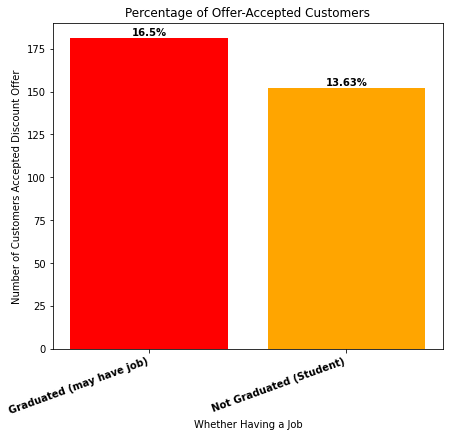

In [18]:
plt.figure(figsize=(7,6))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(data_bar.Education, data_bar.Response, color = colors_list)
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(data_bar.Response_Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1

bars = ('Graduated (may have job)', 'Not Graduated (Student)')
y_pos = np.arange(len(bars))
plt.title('Percentage of Offer-Accepted Customers')
plt.xticks(y_pos, bars, color='black', fontweight='bold', rotation=20, fontsize='10', horizontalalignment='right')
plt.ylabel("Number of Customers Accepted Discount Offer")
plt.xlabel("Whether Having a Job")
plt.show()
#more people who are students accepted discount offer than people who has a job

# Clustering

In [19]:
import seaborn as sns
from sklearn.decomposition import PCA as sk_PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.pipeline import Pipeline

In [20]:
data_pca = data[['Age', 'Education', 'Single', 'TotalKids', 'EnrollmentDuration', 'Recency', 'Complain', 'Income', 
                       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
                       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [21]:
data_pca

,Age,Education,Single,TotalKids,EnrollmentDuration,Recency,Complain,Income,AcceptedCmp1,AcceptedCmp2,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,65,1,1,0,118,58,0,58138.0,0,0,...,88,546,172,88,88,3,8,10,4,7
1,68,1,1,2,90,38,0,46344.0,0,0,...,1,6,2,1,6,2,1,1,2,5
2,57,1,0,0,101,26,0,71613.0,0,0,...,49,127,111,21,42,1,8,2,10,4
3,38,1,0,1,88,26,0,26646.0,0,0,...,4,20,10,3,5,2,2,0,4,6
4,41,0,0,1,96,94,0,58293.0,0,0,...,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,1,0,1,104,46,0,61223.0,0,0,...,43,182,42,118,247,2,9,3,4,5
2236,76,0,0,3,88,56,0,64014.0,1,0,...,0,30,0,0,8,7,8,2,5,7
2237,41,1,1,0,96,91,0,56981.0,0,0,...,48,217,32,12,24,1,2,3,13,6
2238,66,0,0,1,96,8,0,69245.0,0,0,...,30,214,80,30,61,2,6,5,10,3


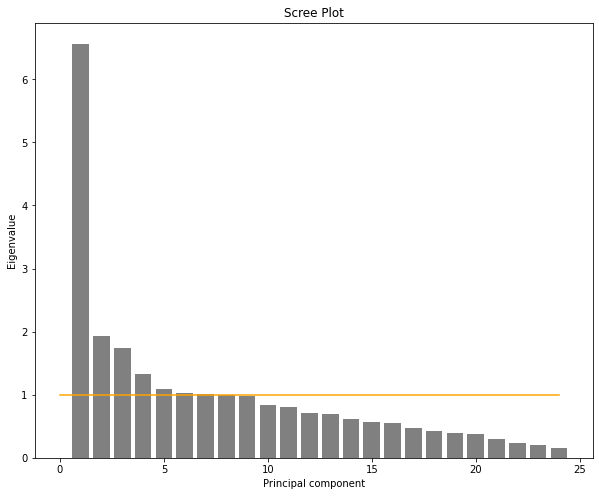

In [22]:
pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', sk_PCA())])
pca_pipeline.fit(data_pca)
eigVals=pca_pipeline[1].explained_variance_
nComponents = data_pca.shape[1]
x = np.linspace(1,nComponents, nComponents)
plt.figure(figsize=(10, 8))
plt.bar(x, eigVals, color='gray')
plt.plot([0,nComponents],[1,1],color='orange') # Orange Kaiser criterion line for the fox
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.savefig('Scree Plot.png', dpi=200, bbox_inches='tight')
plt.show()

In [23]:
covarExplained = eigVals/sum(eigVals)*100
print("Variance explained by the 9 PCs above is: %.3f " % (sum(covarExplained[:9])))

Variance explained by the 9 PCs above is: 69.359 


In [24]:
data_pca_9pc = pca_pipeline.transform(data_pca)[:, :9]

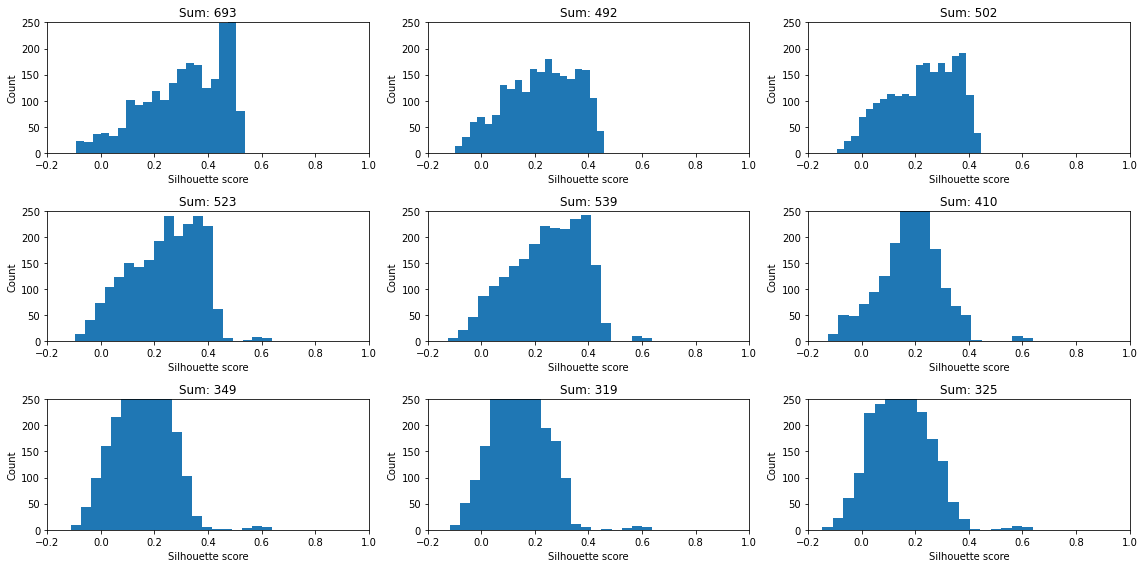

In [25]:
numClusters = 9 # looping over 2 to 10 clusters
Q = np.empty([numClusters,1])*np.NaN 

# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 11): # Loop through each cluster
    kMeans = KMeans(n_clusters = int(ii), random_state = 11535149).fit(data_pca_9pc) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(data_pca_9pc,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1) 
    plt.hist(s,bins=20) 
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

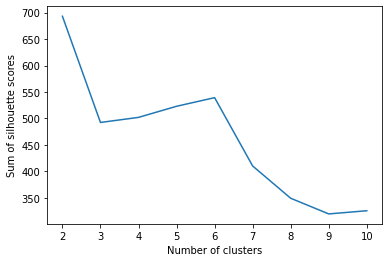

In [26]:
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of silhouette scores')
plt.show() # 2 clusters is the optimal choice

In [27]:
Income_Mnt = data[['Income', 'MntTotal']]

kmeans = KMeans(
     init = "random",
     n_clusters = 2,
     n_init = 10,
     max_iter = 300,
     random_state = 11535149
    )

kmeans.fit(data_pca_9pc)
labels = kmeans.labels_
data_pca['Cluster'] = labels
Income_Mnt['Cluster'] = labels

<ipython-input-27-2522d291c128>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pca['Cluster'] = labels
<ipython-input-27-2522d291c128>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Income_Mnt['Cluster'] = labels


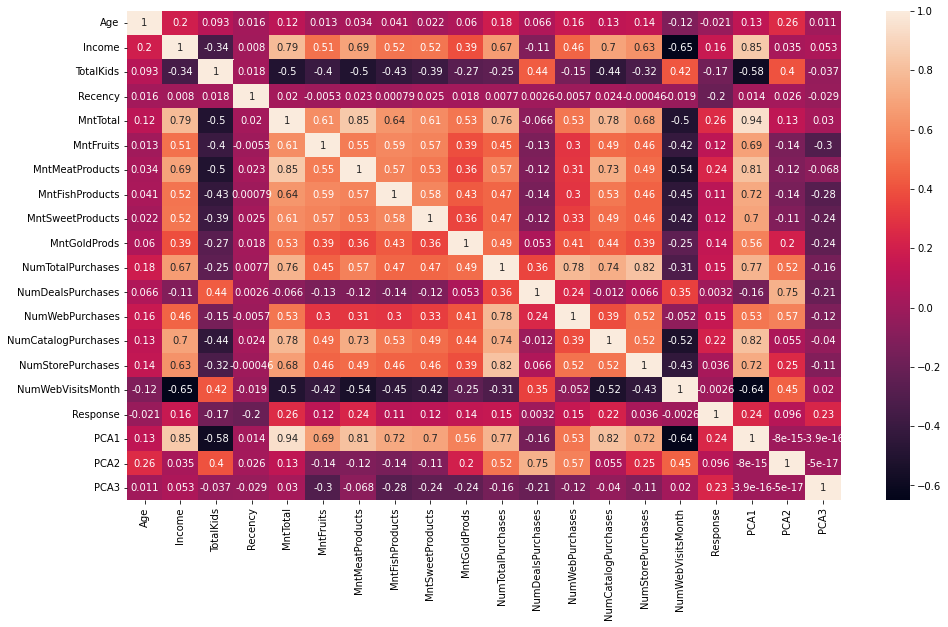

In [28]:
data['PCA1'] = data_pca_9pc[:, 0]
data['PCA2'] = data_pca_9pc[:, 1]
data['PCA3'] = data_pca_9pc[:, 2]
data['IncomeSpending'] = labels
x_pca = data[["Age", "Income", 
          
          "TotalKids",
          
          "Recency", 
          
          'MntTotal', 'MntFruits', 'MntMeatProducts', 
          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
           
           "NumTotalPurchases", 'NumDealsPurchases','NumWebPurchases', 
           'NumCatalogPurchases', 'NumStorePurchases',
          
          'NumWebVisitsMonth',

         "Response", 'PCA1', 'PCA2', 'PCA3']].corr()
plt.figure(figsize=(16,9))
ax = sns.heatmap(x_pca, annot = True)
plt.savefig('heatmap.png', dpi=200, bbox_inches='tight')
plt.show()

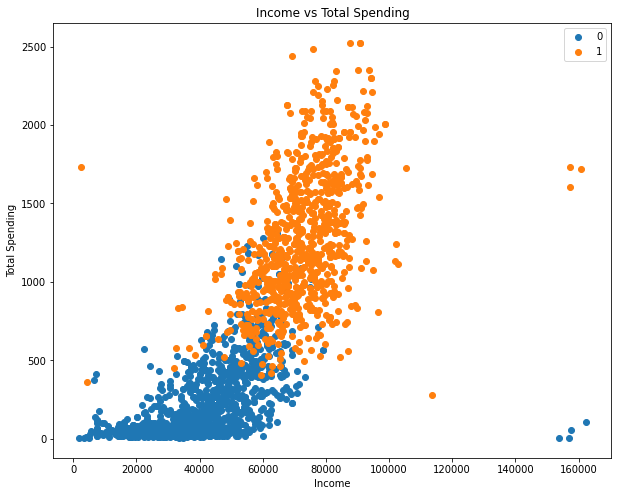

In [29]:
uniq_labels = np.unique(labels)

plt.figure(figsize=(10, 8))  
for i in uniq_labels:
    plt.scatter(Income_Mnt[Income_Mnt['Cluster'] == i]['Income'] , Income_Mnt[Income_Mnt['Cluster'] == i]['MntTotal'] 
                , label = i, cmap ='viridis')
plt.legend()
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.title('Income vs Total Spending')
plt.savefig('cluster.png', dpi=200, bbox_inches='tight')

# Inference

In [ ]:
power = TTestPower()
n_test = power.solve_power(nobs=40, effect_size = 0.5,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

Power: 0.869


In [ ]:
#create tableone and construct hypothesis test, standardized mean difference
#source: https://doi.org/10.1093/jamiaopen/ooy012
data_inf = data.copy()
data_inf["Age1"] = data["Age"]
data_inf["Income1"] = data["Income"]
data_inf["MntTotal1"] = data["MntTotal"]
data_inf["MntFruits1"] = data["MntFruits"]
data_inf["MntMeatProducts1"] = data["MntMeatProducts"]
data_inf["MntFishProducts1"] = data["MntFishProducts"]
data_inf["MntSweetProducts1"] = data["MntSweetProducts"]
data_inf["MntGoldProds1"] = data["MntGoldProds"]
data_inf["NumTotalPurchases1"] = data["NumTotalPurchases"]
data_inf["NumDealsPurchases1"] = data["NumDealsPurchases"]
data_inf["NumWebPurchases1"] = data["NumWebPurchases"]
data_inf["NumCatalogPurchases1"] = data["NumCatalogPurchases"]
data_inf["NumStorePurchases1"] = data["NumStorePurchases"]
data_inf["NumWebVisitsMonth1"] = data["NumWebVisitsMonth"]
data_inf["Response"] = np.select([(data_inf["Response"] == 1),
                                       (data_inf["Response"] == 0)], 
                                     ["1", "0"])

columns = ["Education", 
           #"Marital_Status", 
           #"Single",
           "IncomeSpending",
           "Family_Situation",
           "Age1",
           "Age", "Age_Group",
           'Income1',
           'Income', "Income_Group","Income_Situation",
           
           'TotalKids', 'Kidhome', 'Teenhome', 
           
           'Recency',
           
           'MntTotal1', 'MntTotal',
           'MntFruits1', 'MntFruits',
           'MntMeatProducts1', 'MntMeatProducts',
           'MntFishProducts1', 'MntFishProducts',
           'MntSweetProducts1', 'MntSweetProducts', 
           'MntGoldProds1', 'MntGoldProds',
           
           "NumTotalPurchases1", "NumTotalPurchases",
           'NumDealsPurchases1', 'NumDealsPurchases',
           'NumWebPurchases1',  'NumWebPurchases', 
           'NumCatalogPurchases1', 'NumCatalogPurchases', 
           'NumStorePurchases1', 'NumStorePurchases',
           'NumWebVisitsMonth1', 'NumWebVisitsMonth',
           'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'Complain']

categorical = ["Education", 
           #"Marital_Status", 
           #"Single",
           "IncomeSpending",
           "Family_Situation",
           "Age_Group",
           "Income_Group",
           "Income_Situation",
           'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'Complain']

labels = {'Response': 'if accept the offer at last campaign'}

groupby = "Response"

nonnormal = ["Age", "Income",
             'MntTotal', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
           
             "NumTotalPurchases", 'NumDealsPurchases','NumWebPurchases', 
             'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth',]

table_1 = TableOne(data_inf, columns=columns, categorical=categorical, 
                   groupby=groupby, nonnormal=nonnormal, rename=labels, pval=True, smd=True, htest_name=True, 
                   missing = False)

table_1
print(table_1.tabulate(tablefmt = "fancy_grid"))
table_1.to_excel('table_1.xlsx')

╒═════════════════════════════════════╤══════════════════╤═══════════════════════════╤═══════════════════════════╤═══════════════════════════╤═══════════╤═══════════════════╤═════════════╕
│                                     │                  │ Overall                   │ 0                         │ 1                         │ P-Value   │ Test              │ SMD (0,1)   │
╞═════════════════════════════════════╪══════════════════╪═══════════════════════════╪═══════════════════════════╪═══════════════════════════╪═══════════╪═══════════════════╪═════════════╡
│ n                                   │                  │ 2212                      │ 1879                      │ 333                       │           │                   │             │
├─────────────────────────────────────┼──────────────────┼───────────────────────────┼───────────────────────────┼───────────────────────────┼───────────┼───────────────────┼─────────────┤
│ Education, n (%)                    │ 0              

In [ ]:
#create tableone and construct hypothesis test, standardized mean difference
#source: https://doi.org/10.1093/jamiaopen/ooy012
columns = ["Education", 
           #"Marital_Status", 
           #"Single",
           "IncomeSpending",
           "Family_Situation",
           "Age1",
           "Age", "Age_Group",
           'Income1',
           'Income', "Income_Group","Income_Situation",
           
           'TotalKids', 'Kidhome', 'Teenhome', 
           
           'Recency',
           
          #  'MntFruits1', 'MntFruits',
          #  'MntMeatProducts1', 'MntMeatProducts',
          #  'MntFishProducts1', 'MntFishProducts',
          #  'MntSweetProducts1', 'MntSweetProducts', 
          #  'MntGoldProds1', 'MntGoldProds',
           
           "NumTotalPurchases1", "NumTotalPurchases",
           'NumDealsPurchases1', 'NumDealsPurchases',
           'NumWebPurchases1',  'NumWebPurchases', 
           'NumCatalogPurchases1', 'NumCatalogPurchases', 
           'NumStorePurchases1', 'NumStorePurchases',
           'NumWebVisitsMonth1', 'NumWebVisitsMonth',
           'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'Complain']

categorical = ["Education", 
           #"Marital_Status", 
           #"Single",
           "IncomeSpending",
           "Family_Situation",
           "Age_Group",
           "Income_Group", "Income_Situation",
           'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'Complain']

labels = {'MntTotalLabel': 'if total spending is higher than median'}

data_inf["MntTotalLabel"] = np.select([(data_inf["MntTotal"] < data_inf["MntTotal"].median()),
                                       (data_inf["MntTotal"] >= data_inf["MntTotal"].median())], 
                                     ["low total spending", "high total spending"])
groupby = "MntTotalLabel"

nonnormal = ["Age", "Income",
             #'MntTotal', 
             #'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
           
             "NumTotalPurchases", 'NumDealsPurchases','NumWebPurchases', 
             'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth',]

table_2 = TableOne(data_inf, columns=columns, categorical=categorical, 
                   groupby=groupby, nonnormal=nonnormal, rename=labels, pval=True, smd=True, htest_name=True, 
                   missing = False)

table_2
print(table_2.tabulate(tablefmt = "fancy_grid"))
#Education, Teenhome, Recency, NumDealsPurchases, AcceptedCmp3, complain are not significant for the high/low total spending

╒═════════════════════════════════════╤══════════════════╤═══════════════════════════╤═══════════════════════════╤═══════════════════════════╤═══════════╤═══════════════════╤════════════════════════════════════════════════╕
│                                     │                  │ Overall                   │ high total spending       │ low total spending        │ P-Value   │ Test              │ SMD (high total spending,low total spending)   │
╞═════════════════════════════════════╪══════════════════╪═══════════════════════════╪═══════════════════════════╪═══════════════════════════╪═══════════╪═══════════════════╪════════════════════════════════════════════════╡
│ n                                   │                  │ 2212                      │ 1107                      │ 1105                      │           │                   │                                                │
├─────────────────────────────────────┼──────────────────┼───────────────────────────┼──────────────────

# Prediction

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
s = np.random.seed(11535149)
seed = 11535149 

In [ ]:
predictors = data[['Income', 'Recency', 'Complain', 'Response', 'Age', 'NumTotalPurchases', 'TotalKids', 'Single', 'Education', 'EnrollmentDuration', 'AcceptNum']]
target = data['MntTotal']
y = target.dropna().to_numpy()
R2_list = np.zeros(predictors.shape[1])
betas_list = np.zeros((predictors.shape[1],2))

for i in range(predictors.shape[1]):
    x = predictors.iloc[:,i].dropna().to_numpy()
    reg = LinearRegression().fit(x.reshape(-1,1), y)
    y_hat = float(reg.coef_)*x + reg.intercept_
    R2_list[i] = r2_score(y, y_hat)
    betas_list[i,0] = reg.coef_
    betas_list[i,1] = reg.intercept_

R2table=pd.DataFrame([predictors.columns.values, R2_list, betas_list[:,0], betas_list[:,1]]).transpose()
R2table.columns= ['Predictor', 'COD', 'Beta1', 'Beta0']
R2table_sort=R2table.sort_values(by=['COD'], ascending=False)
R2table_sort['COD']=np.around(R2table_sort['COD'].astype('float'),4)
R2table_sort['Beta1']=np.around(R2table_sort['Beta1'].astype('float'),4)
R2table_sort['Beta0']=np.around(R2table_sort['Beta0'].astype('float'),4)
R2table_sort
#R2table_sort['Betas'].apply(lambda x: np.round(x, 4 - int(np.floor(np.log10(np.abs(x))))))

,Predictor,COD,Beta1,Beta0
0,Income,0.6284,0.0222,-545.5676
5,NumTotalPurchases,0.5729,59.4434,-277.9339
6,TotalKids,0.2499,-401.9061,988.0977
10,AcceptNum,0.2084,404.6984,486.5172
3,Response,0.0699,445.4520,540.2086
9,EnrollmentDuration,0.0190,10.7016,-491.6583
4,Age,0.0134,5.9677,290.4639
2,Complain,0.0012,-217.2322,609.2322
8,Education,0.0006,30.0853,592.1030
7,Single,0.0004,26.3567,597.9265


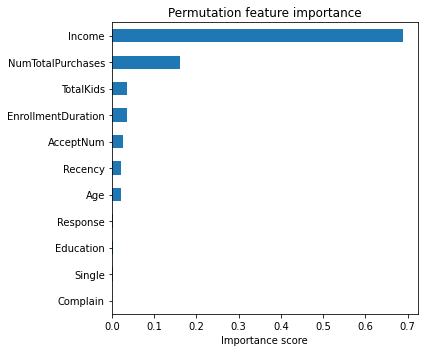

In [ ]:
X = predictors.values
Y = target.values
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X, Y)
imp = rf.feature_importances_

fig, ax = plt.subplots(figsize=(6, 5))
pd.Series(rf.feature_importances_, index=predictors.columns).nlargest(11).plot(kind='barh')   
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
plt.gca().invert_yaxis()
fig.tight_layout()
plt.show()
fig.savefig('permutation feature importance.png', dpi=200, bbox_inches='tight')

(1769, 2) (1769,) (443, 2) (443,)
betas: [1.48826092e-02 3.14982715e+01] -632.6630508607058
R^2: 0.69094
RMSE: 332.6547


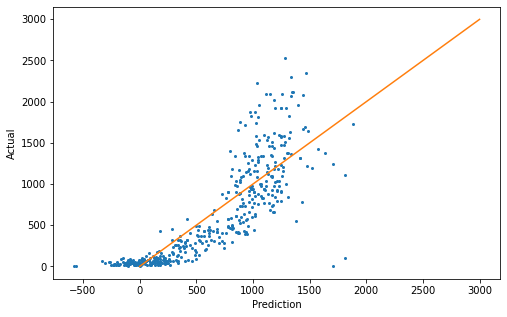

In [ ]:
# predict Mnt_Total from Income, Num_Total_Purchases
X = data[['Income', 'NumTotalPurchases']]
Y = data['MntTotal']

X_train, X_test, y_train, y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state = seed)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

reg = LinearRegression().fit(X_train, y_train)
print('betas:', reg.coef_, reg.intercept_)
y_hat = reg.predict(X_test)
r2 = r2_score(y_test,y_hat)
print('R^2:', r2.round(5))
rmse = np.sqrt(mean_squared_error(y_hat, y_test))
print('RMSE:', rmse.round(5))

plt.figure(figsize=(8,5))
plt.plot(y_hat, y_test, 'o', ms=2)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.plot(np.arange(0, 3000, 1), np.arange(0, 3000, 1), '-')
plt.show()

In [ ]:
# evaluate the Ridge Regression model
model = Ridge(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)
scores = cross_val_score(model, X, Y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_hat= model.predict(X_test)
print("RMSE for Ridge Regularization at alpha=1: ", np.sqrt(mean_squared_error(y_hat, y_test)))
print("R^2 for Ridge Regularization at alpha=1: ", r2_score(y_test,y_hat))

RMSE: 318.470 (20.599)
RMSE for Ridge Regularization at alpha=1:  332.65488190636046
R^2 for Ridge Regularization at alpha=1:  0.6909373917435369


RMSE: -314.846
Config: {'alpha': 199}
RMSE for Ridge Regularization at alpha = 199  :  332.6919543887107
R2 for Ridge Regularization at alpha = 199  :  0.6908685013880274
betas:  [1.49098518e-02 3.13870430e+01] -632.4219488055818


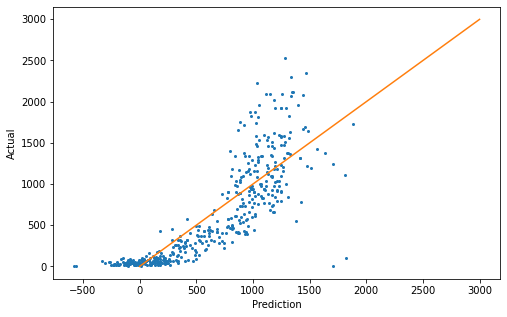

In [ ]:
grid = dict()
grid['alpha'] = np.arange(0, 200, 1) #[2.0**c for c in np.arange(-5, 6)]

search = GridSearchCV(Ridge(), grid, scoring='neg_root_mean_squared_error', cv=10)
results = search.fit(X_train, y_train)
print('RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

model = Ridge(alpha=results.best_params_['alpha'])
model.fit(X_train, y_train)
y_hat= model.predict(X_test)
print("RMSE for Ridge Regularization at alpha =", results.best_params_['alpha'], ' : ', np.sqrt(mean_squared_error(y_hat, y_test)))
print("R2 for Ridge Regularization at alpha =", results.best_params_['alpha'], ' : ', r2_score(y_test,y_hat))
print('betas: ', model.coef_, model.intercept_)

plt.figure(figsize=(8,5))
plt.plot(y_hat, y_test, 'o', ms=2)
plt.plot(np.arange(0, 3000, 1), np.arange(0, 3000, 1), '-')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [ ]:
# evaluate the Lasso Regression model
model = Lasso(alpha=1.0)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)
scores = cross_val_score(model, X, Y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print('RMSE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

model = Lasso(alpha=1.0)
model.fit(X_train, y_train)
y_hat= model.predict(X_test)
print("RMSE for Lasso Regularization at alpha=1: ", np.sqrt(mean_squared_error(y_hat, y_test)))
print("R^2 for Lasso Regularization at alpha=1: ", r2_score(y_test,y_hat))

RMSE: 318.471 (20.603)
RMSE for Lasso Regularization at alpha=1:  332.66512243124953
R^2 for Lasso Regularization at alpha=1:  0.6909183629408961


RMSE: -314.848
Config: {'alpha': 2}
RMSE for Lasso Regularization at alpha = 2  :  332.6756535332969
R2 for Lasso Regularization at alpha = 2  :  0.6908987935808265
betas:  [1.48980486e-02 3.14352519e+01] -632.5266719207574


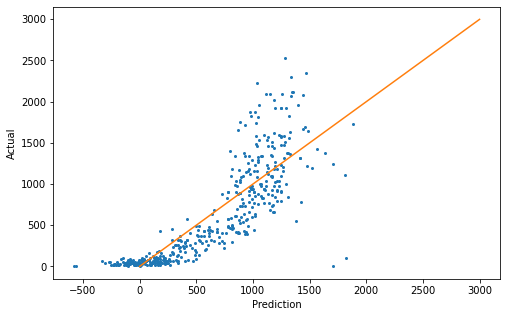

In [ ]:
grid = dict()
grid['alpha'] = np.arange(1, 100, 1) #[2.0**c for c in np.arange(-5, 6)]

search = GridSearchCV(Lasso(), grid, scoring='neg_root_mean_squared_error', cv=10)
results = search.fit(X_train, y_train)
print('RMSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

model = Lasso(alpha=results.best_params_['alpha'])
model.fit(X_train, y_train)
y_hat= model.predict(X_test)
print("RMSE for Lasso Regularization at alpha =", results.best_params_['alpha'], ' : ', np.sqrt(mean_squared_error(y_hat, y_test)))
print("R2 for Lasso Regularization at alpha =", results.best_params_['alpha'], ' : ', r2_score(y_test,y_hat))
print('betas: ', model.coef_, model.intercept_)

plt.figure(figsize=(8,5))
plt.plot(y_hat, y_test, 'o', ms=2)
plt.plot(np.arange(0, 3000, 1), np.arange(0, 3000, 1), '-')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# Classification

In [31]:
data['Response'].value_counts()

0    1879
1     333
Name: Response, dtype: int64

In [32]:
from tqdm import notebook
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

s = np.random.seed(11535149)
seed = 11535149
np.random.seed(seed)

In [33]:
# use lasso regression to do feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, auc, f1_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV

INDEPENDENT_VARIABLES = ['Age', 'Education', 'Single', 'TotalKids', 'IncomeSpending', 
                         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                         'NumDealsPurchases', 'NumWebVisitsMonth', 'EnrollmentDuration', 'Recency', 'Complain', 
                         'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
DEPENDENT_VARIABLE = 'Response'
X, y = data[INDEPENDENT_VARIABLES].values, data[DEPENDENT_VARIABLE].values
print("Full Dataset Shape: ", X.shape)
print("Full Labels Shape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

reg = LogisticRegression(penalty="l1", solver="liblinear", random_state=seed)
param_grid = {'C': [i for i in np.linspace(start = 0.01, stop = 1, num = 100)]}
reg_grid = GridSearchCV(estimator = reg, param_grid = param_grid, scoring="roc_auc")
reg_grid.fit(X_train, y_train)
y_pred = reg_grid.predict(X_test)
y_probs = reg_grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
print("--- Best Result ---")
print("Best lambda: %.2f" % reg_grid.best_params_['C'])
print("Accuracy: %.3f" % accuracy_score(y_pred, y_test))
print("F1-Score: %.3f" % f1_score(y_pred, y_test))
print("AUROC: %.3f" % auc(fpr, tpr))

Full Dataset Shape:  (2212, 18)
Full Labels Shape: (2212,)
--- Best Result ---
Best lambda: 0.97
Accuracy: 0.885
F1-Score: 0.557
AUROC: 0.882


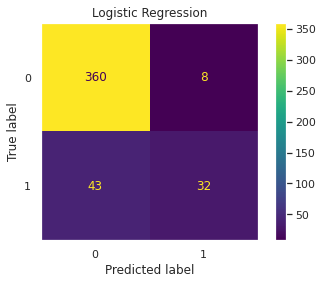

In [34]:
# best model
best_LR = LogisticRegression(penalty="l1", solver="liblinear", C = reg_grid.best_params_['C'], random_state=seed)
best_LR.fit(X_train, y_train)

# Confusion Matrix
conf_matrix_sk = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sk, display_labels=[0,1])
disp.plot()
plt.grid()
plt.title('Logistic Regression')
plt.savefig('confusion matrix of lr.png', dpi=200, bbox_inches='tight')

In [35]:
INDEPENDENT_VARIABLES = list(np.array(INDEPENDENT_VARIABLES)[(np.abs(best_LR.coef_)>=0.001)[0]])
print("Remaining variables after selection:", INDEPENDENT_VARIABLES)

DEPENDENT_VARIABLE = 'Response'
X, y = data[INDEPENDENT_VARIABLES].values, data[DEPENDENT_VARIABLE].values
print("Dataset Shape: ", X.shape)
print("Labels Shape:", y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

Remaining variables after selection: ['Education', 'Single', 'TotalKids', 'IncomeSpending', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth', 'EnrollmentDuration', 'Recency', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
Dataset Shape:  (2212, 16)
Labels Shape: (2212,)


--- Best Result ---
Best n_estimators:  {'class_weight': 'balanced_subsample', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.874
F1-Score: 0.678
AUROC: 0.904


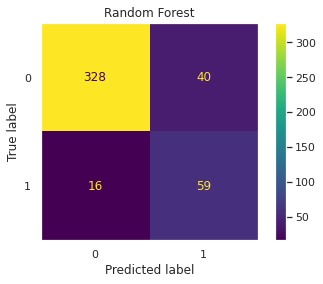

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=seed)
param_grid = {'n_estimators': [i for i in range(50, 200, 10)], 
              'min_samples_split': [i for i in range(10, 30, 10)], 
              'min_samples_leaf': [i for i in range(10, 20, 10)], 
              'class_weight': ['balanced', 'balanced_subsample']}
rf_grid = GridSearchCV(estimator = rf, param_grid = param_grid, scoring="f1")
rf_grid.fit(X_train, y_train)
y_pred = rf_grid.predict(X_test)
y_probs = rf_grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
print("--- Best Result ---")
print("Best n_estimators: ", rf_grid.best_params_)
print("Accuracy: %.3f" % accuracy_score(y_pred, y_test))
print("F1-Score: %.3f" % f1_score(y_pred, y_test))
print("AUROC: %.3f" % auc(fpr, tpr))

# Confusion Matrix
conf_matrix_sk = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sk, display_labels=[0,1])
disp.plot()
plt.grid()
plt.title('Random Forest')
plt.savefig('confusion matrix of rf.png', dpi=200, bbox_inches='tight')

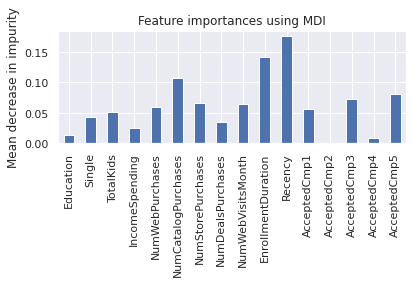

In [ ]:
# best model
best_rf = RandomForestClassifier(n_estimators = rf_grid.best_params_['n_estimators'], 
                                 min_samples_split = rf_grid.best_params_['min_samples_split'], 
                                 min_samples_leaf = rf_grid.best_params_['min_samples_leaf'], 
                                 class_weight = rf_grid.best_params_['class_weight'], 
                                 random_state=seed)
best_rf.fit(X_train, y_train)
importances = best_rf.feature_importances_
feature_names = INDEPENDENT_VARIABLES
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

--- Best Result ---
Best alpha: 0.218
Accuracy: 0.869
F1-Score: 0.586
AUROC: 0.853


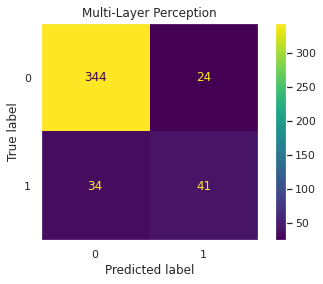

In [46]:
# Multi-Layer Perception
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

INDEPENDENT_VARIABLES = ['Education', 'Single', 'TotalKids', 
                         'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
                         'NumDealsPurchases', 'NumWebVisitsMonth', 'EnrollmentDuration', 'Recency',  
                         'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'IncomeSpending']
DEPENDENT_VARIABLE = 'Response'

X, y = data[INDEPENDENT_VARIABLES].values, data[DEPENDENT_VARIABLE].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 2), random_state=seed)
param_grid = {'alpha': [i for i in np.linspace(start = 0.001, stop = 2, num = 2000)]}
mlp_grid = GridSearchCV(estimator = mlp, param_grid = param_grid, scoring="f1")
mlp_grid.fit(X_train, y_train)
y_pred = mlp_grid.predict(X_test)
y_probs = mlp_grid.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs, pos_label=1)
print("--- Best Result ---")
print("Best alpha:", mlp_grid.best_params_['alpha'])
print("Accuracy: %.3f" % accuracy_score(y_pred, y_test))
print("F1-Score: %.3f" % f1_score(y_pred, y_test))
print("AUROC: %.3f" % auc(fpr, tpr))

# Confusion Matrix
conf_matrix_sk = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_sk, display_labels=[0,1])
disp.plot()
plt.grid()
plt.title('Multi-Layer Perception')
plt.savefig('confusion matrix of mlp.png', dpi=200, bbox_inches='tight')